# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [66]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [67]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [69]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data['Model_Age'] = 2023 - data['Year']

# 파생변수 생성 : Model_Age (현재 연도에서 출시 연도 빼기)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Model_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,9
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,8
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,11
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,10


In [70]:
# 순서가 의미있는 라벨링 인코딩

data['Fuel_Type'] = data['Fuel_Type'].replace('CNG', 1)
data['Fuel_Type'] = data['Fuel_Type'].replace('Diesel', 3)
data['Fuel_Type'] = data['Fuel_Type'].replace('Petrol', 2)
data['Fuel_Type'] = data['Fuel_Type'].replace('LPG', 4)
data['Fuel_Type'] = data['Fuel_Type'].replace('Electric', 0)

data['Owner_Type'] = data['Owner_Type'].replace('First', 0)
data['Owner_Type'] = data['Owner_Type'].replace('Second', 1)
data['Owner_Type'] = data['Owner_Type'].replace('Third', 2)
data['Owner_Type'] = data['Owner_Type'].replace('Fourth & Above', 3)

data['Transmission'] = data['Transmission'].replace('Manual', 0)
data['Transmission'] = data['Transmission'].replace('Automatic', 1)

data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Model_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,1,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,3,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,2,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,3,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,3,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,3,0,0,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,9
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,3,0,0,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,8
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,3,0,1,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,11
6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,0,0,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,10


In [71]:
import re

# float, str이 혼재된 데이터에서 오로지 float 부분만 추출해내는 함수
def extract_numeric_value(string_with_value):
    if isinstance(string_with_value, str):
        numeric_part = re.findall(r'\d+\.\d+|\d+', string_with_value)
        return float(numeric_part[0]) if numeric_part else None
    else:
        return None

# 회귀분석을 위해 수치 데이터만 남도록 우리 데이터에 적용
data['Mileage'] = data['Mileage'].apply(extract_numeric_value)
data['Engine'] = data['Engine'].apply(extract_numeric_value)
data['Power'] = data['Power'].apply(extract_numeric_value)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Model_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,1,0,0,26.60,998.0,58.16,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,3,0,0,19.67,1582.0,126.20,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,2,0,0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,3,0,0,20.77,1248.0,88.76,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,3,1,1,15.20,1968.0,140.80,5.0,NaN,17.74,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,3,0,0,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75,9
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,3,0,0,24.40,1120.0,71.00,5.0,NaN,4.00,8
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,3,0,1,14.00,2498.0,112.00,8.0,NaN,2.90,11
6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,0,0,18.90,998.0,67.10,5.0,NaN,2.65,10


In [72]:
# 차종 하나하나는 약 1800개로 너무 많아 맨 앞 단어만 가져와서 '브랜드' 컬럼 생성, 더미변수 생성

data['Brand'] = data['Name'].str.split().str[0]
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [73]:
# 순서 상관없는 인코딩 : 더미변수 생성하기

data = pd.get_dummies(data, columns = ['Brand'])
data = data.replace(False, 0)
data = data.replace(True, 0)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Model_Age,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,1,0,0,26.60,998.0,58.16,5.0,NaN,1.75,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,3,0,0,19.67,1582.0,126.20,5.0,NaN,12.50,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,2011,46000,2,0,0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,3,0,0,20.77,1248.0,88.76,7.0,NaN,6.00,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,3,1,1,15.20,1968.0,140.80,5.0,NaN,17.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,3,0,0,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,3,0,0,24.40,1120.0,71.00,5.0,NaN,4.00,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,3,0,1,14.00,2498.0,112.00,8.0,NaN,2.90,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,0,0,18.90,998.0,67.10,5.0,NaN,2.65,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


KeyError: "['Name', 'Location', 'Year'] not found in axis"

In [82]:
# 회귀분석에 필요없는 컬럼 삭제 : New_Price는 결측치가 너무 많아서 삭제
data.drop(['Name', 'Location', 'Year', 'New_Price'], axis=1, inplace=True)

# 결측치 있으면 astype 적용 불가하므로 결측치 하나라도 있는 행 삭제
data = data.dropna()
data

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model_Age,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000,1,0,0,26.60,998.0,58.16,5.0,1.75,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,3,0,0,19.67,1582.0,126.20,5.0,12.50,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,2,0,0,18.20,1199.0,88.70,5.0,4.50,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,3,0,0,20.77,1248.0,88.76,7.0,6.00,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,3,1,1,15.20,1968.0,140.80,5.0,17.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,3,0,0,28.40,1248.0,74.00,5.0,4.75,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6015,100000,3,0,0,24.40,1120.0,71.00,5.0,4.00,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6016,55000,3,0,1,14.00,2498.0,112.00,8.0,2.90,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6017,46000,2,0,0,18.90,998.0,67.10,5.0,2.65,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

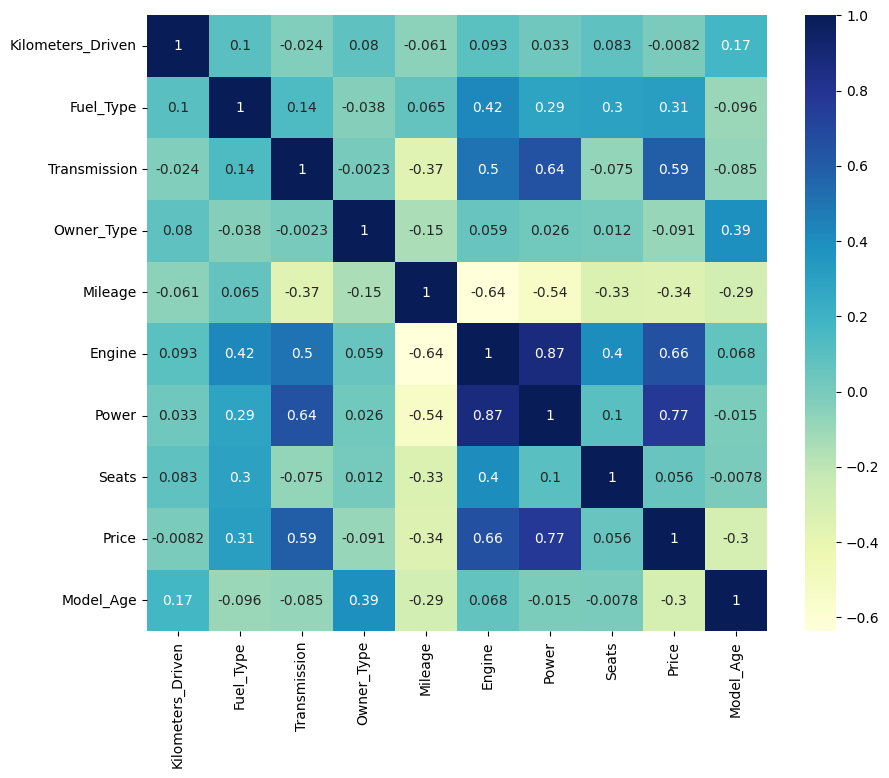

In [86]:
# 상관관계 확인

plt.figure(figsize=(10,8))
sns.heatmap(data.iloc[:,:10].corr(), annot=True, cmap='YlGnBu')

In [87]:
X = data.drop(['Price'], axis=1)
y = data['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 오버피팅 유무를 확인할 valid set도 train set 내에서 확보
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [115]:
train_data = x_train.join(y_train)
train_data

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model_Age,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Price
3420,39000,3,0,0,22.07,1199.0,73.9,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.05
1167,65000,2,0,0,18.50,1197.0,80.0,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00
2247,33485,2,0,0,19.10,1197.0,85.8,5.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.59
4109,51579,2,0,0,20.73,1373.0,91.1,5.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.95
5026,72000,3,0,0,23.40,1248.0,74.0,5.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,93000,2,0,0,15.70,1390.0,75.0,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.50
812,39929,3,0,0,20.77,1248.0,88.8,7.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.56
2487,70000,2,0,1,13.40,1794.0,125.0,5.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70
5440,66507,2,1,1,19.00,1199.0,88.7,5.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.43


array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Model_Age'}>,
        <Axes: title={'center': 'Brand_Ambassador'}>,
        <Axes: title={'center': 'Brand_Audi'}>,
        <Axes: title={'center': 'Brand_BMW'}>],
       [<Axes: title={'center': 'Brand_Bentley'}>,
        <Axes: title={'center': 'Brand_Chevrolet'}>,
        <Axes: title={'center': 'Brand_Datsun'}>,
        <Axes: title={'center': 'Brand_Fiat'}>,
        <Axes: title={'center': 'Brand_Force'}>,
        <Axes: title={'center': 'Brand_Ford'}>],
       [<Axes: title={'center': 'Brand_Honda'}>,
        <Axes: title={'center': 'Brand_Hyundai'}>,
        <Axes: title={'cent

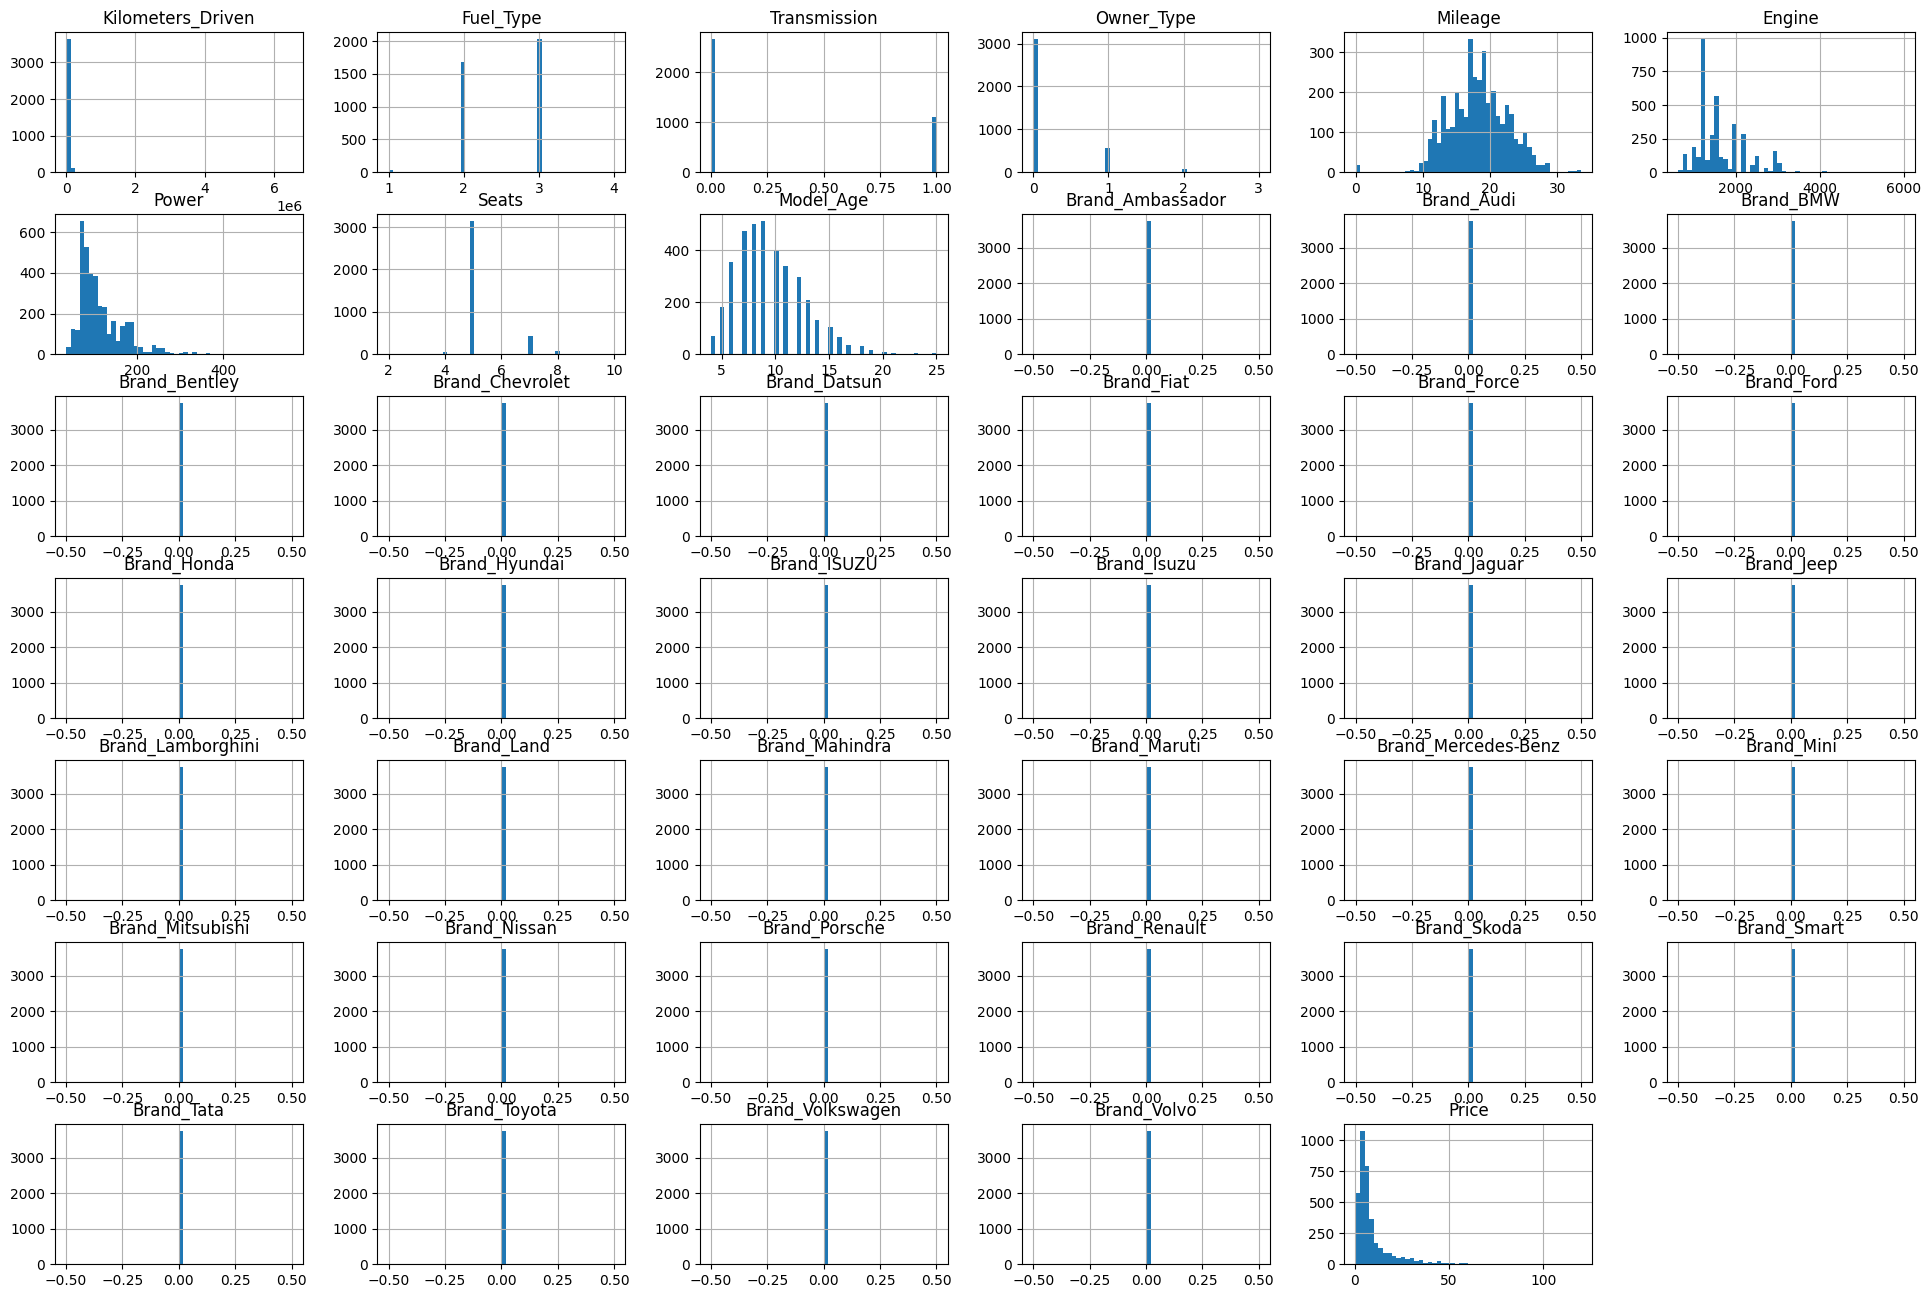

In [112]:
# skewness 확인
train_data.hist(bins=50, figsize=(24,16))

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Model_Age'}>,
        <Axes: title={'center': 'Brand_Ambassador'}>,
        <Axes: title={'center': 'Brand_Audi'}>,
        <Axes: title={'center': 'Brand_BMW'}>],
       [<Axes: title={'center': 'Brand_Bentley'}>,
        <Axes: title={'center': 'Brand_Chevrolet'}>,
        <Axes: title={'center': 'Brand_Datsun'}>,
        <Axes: title={'center': 'Brand_Fiat'}>,
        <Axes: title={'center': 'Brand_Force'}>,
        <Axes: title={'center': 'Brand_Ford'}>],
       [<Axes: title={'center': 'Brand_Honda'}>,
        <Axes: title={'center': 'Brand_Hyundai'}>,
        <Axes: title={'cent

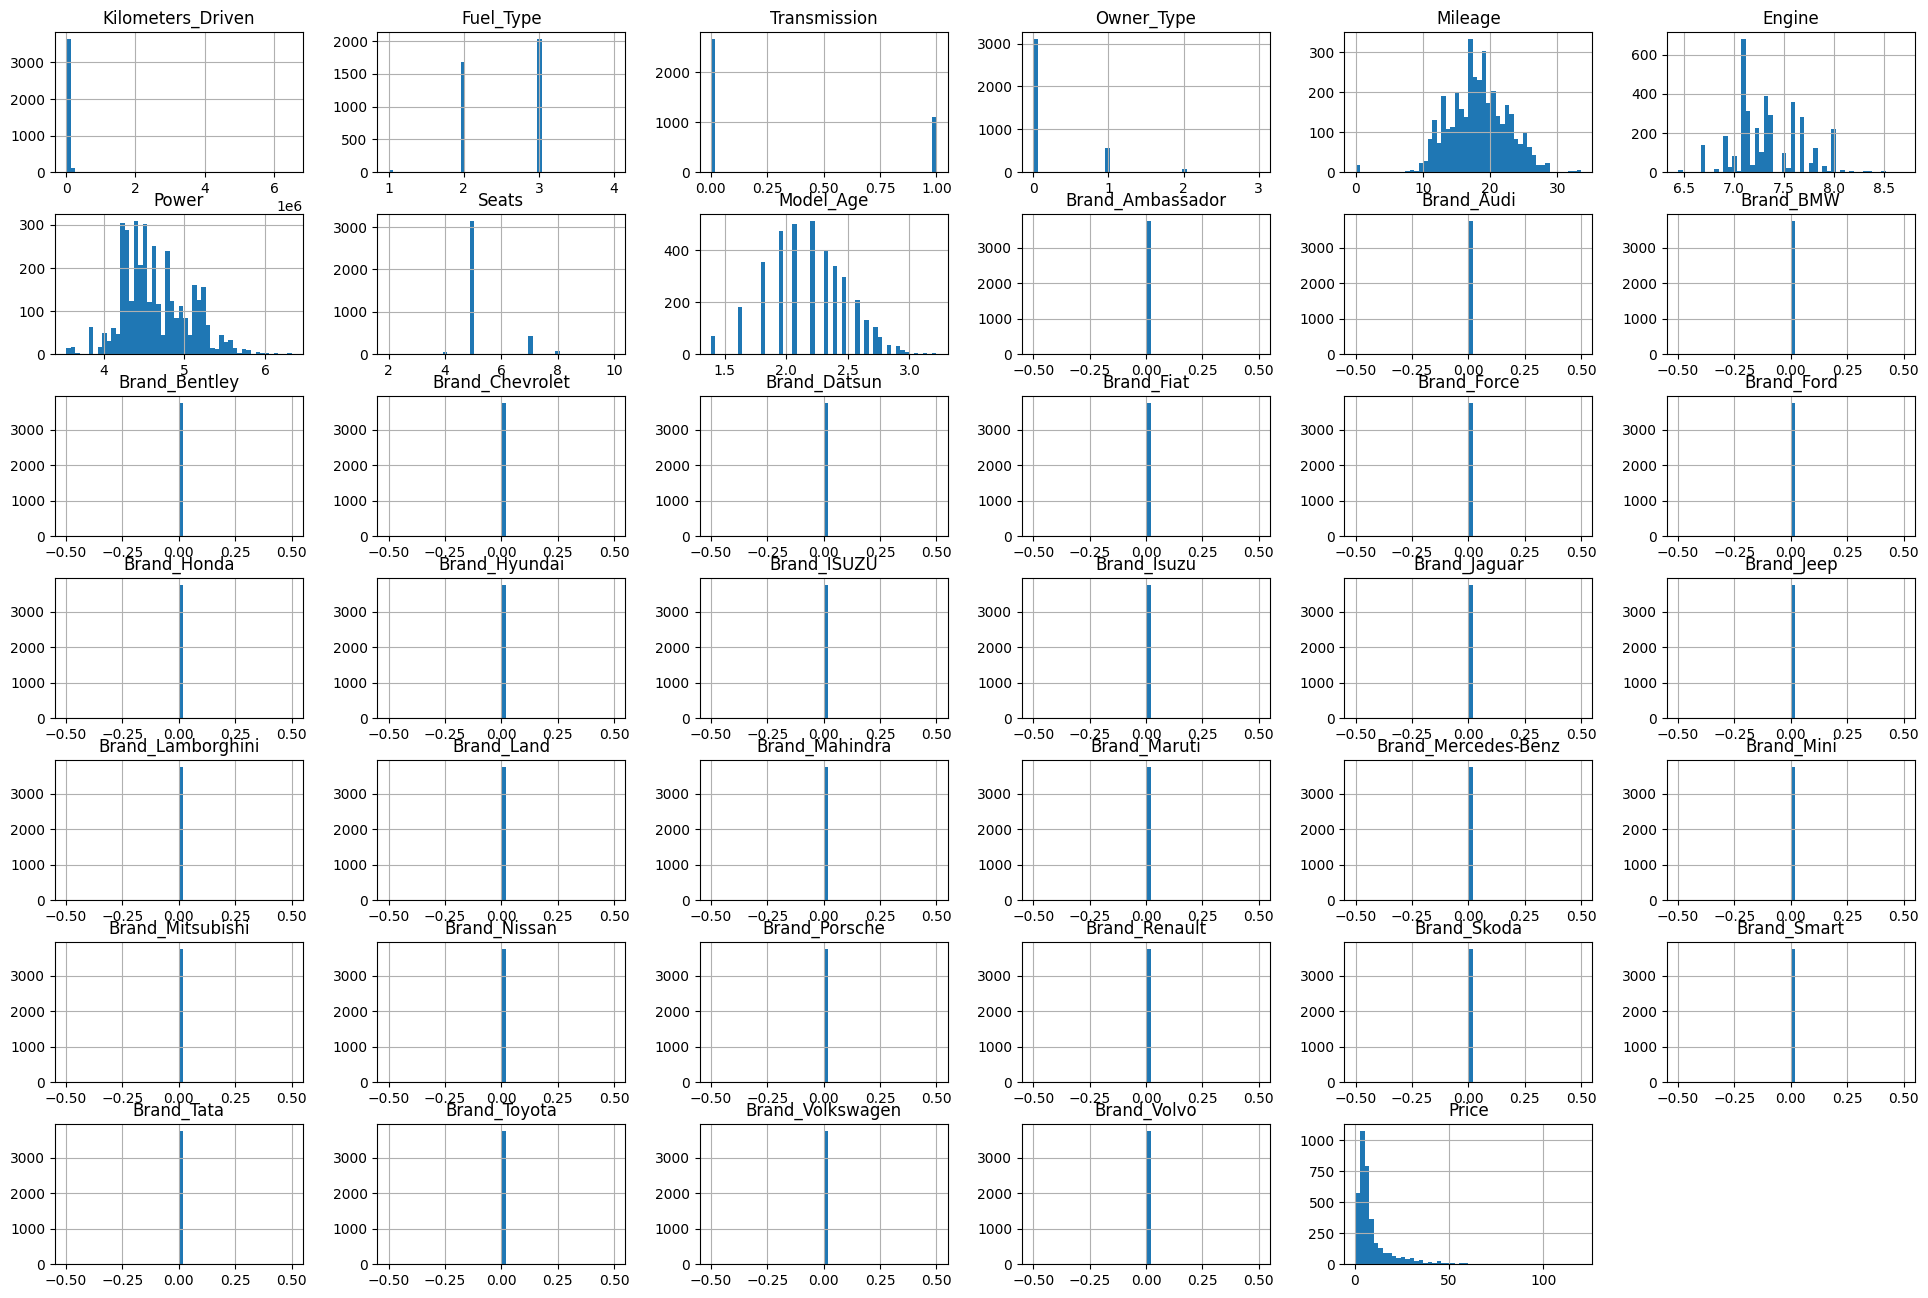

In [117]:
# log transformer 이용하여 skewness 조정
train_data['Model_Age'] = np.log(train_data['Model_Age'])
train_data['Power'] = np.log(train_data['Power'])
train_data['Engine'] = np.log(train_data['Engine'])
train_data.hist(bins=50, figsize=(24,16))

In [ ]:
# 예측변수는 drop 하기
x_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']

In [118]:
# Valid set 에도 똑같이 해주기

valid_data = x_valid.join(y_valid)
valid_data['Model_Age'] = np.log(valid_data['Model_Age'])
valid_data['Power'] = np.log(valid_data['Power'])
valid_data['Engine'] = np.log(valid_data['Engine'])
x_valid, y_valid = valid_data.drop(['Price'], axis=1), valid_data['Price']

In [119]:
test_data = X_test.join(y_test)
test_data['Model_Age'] = np.log(test_data['Model_Age'])
test_data['Power'] = np.log(test_data['Power'])
test_data['Engine'] = np.log(test_data['Engine'])
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

In [120]:
# 예측변수 Price 와 같이 scale이 너무 차이나는 경우 있으므로 MinMaxScaler 실행
from sklearn.preprocessing import  MinMaxScaler, FunctionTransformer

scaler = MinMaxScaler()

scaler.fit(x_train)

# 정답이 유출되지 않도록, train set으로 fit된 알고리즘을 valid, test set에 적용
x_train_s = scaler.transform(x_train)
x_valid_s = scaler.transform(x_valid)
X_test_s = scaler.transform(X_test)

In [121]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_s, y_train)

linear.score(X_test_s, y_test)

-0.3385619681022978

In [122]:
y_pred_li = linear.predict(x_train_s)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_R2 = r2_score(y_train, y_pred_li)
lin_mae = mean_absolute_error(y_train, y_pred_li)
print(lin_R2)
print(lin_mae)
print('--------------------')
y_pred_li = linear.predict(x_valid_s)
lin_r2 = r2_score(y_valid, y_pred_li)
lin_mae = mean_absolute_error(y_valid, y_pred_li)
print(lin_R2)
print(lin_mae)

0.7190667509021096
3.8543905574835646
--------------------
0.7190667509021096
7.667821467368233


In [123]:
# k-fold 교차검증 선형회귀모델

def display_scores(model, scores):
    print('<<', model, '모델 평가 결과 >>')
    print('평균 RMSE: ', scores.mean())
    print('표준편차: ', scores.std())

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linear, x_valid_s, y_valid, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores('선형회귀', lin_rmse_scores)

<< 선형회귀 모델 평가 결과 >>
평균 RMSE:  6.896044384522011
표준편차:  2.5555371772369133


In [124]:
# 최종모델의 성능평가 선형회귀모델

#x_test_nor = scaler.transform(X_test)
final_pred_li = linear.predict(X_test_s)

from sklearn.metrics import mean_squared_error
final_mse_li = mean_squared_error(y_test, final_pred_li)
final_rmse_li = np.sqrt(final_mse_li)
final_r2_li = r2_score(y_test, final_pred_li)

print('RMSE: ', final_rmse_li)
print('R2: ', final_r2_li)

RMSE:  11.850310227334566
R2:  -0.3385619681022978


In [ ]:
# 더미변수를 제대로 처리하지 않은 채 그대로 회귀분석에 넣어 R2 스코어가 매우 낮게 나오는 것으로 추정

In [125]:
# 예측값과 실제값의 비교 - 시각화

pred_li = pd.DataFrame(final_pred_li, columns=['예측가격'])
actual_li = pd.DataFrame(y_test)
actual_li.reset_index(inplace=True, drop=True)
table_li = pd.concat([pred_li, actual_li], axis=1)

table_li

,예측가격,Price
0,4.648493,31.00
1,0.669124,12.50
2,5.221567,19.90
3,1.559976,8.92
4,3.905104,24.68
...,...,...
1170,0.435102,7.11
1171,0.468891,7.52
1172,1.658372,7.75
1173,-0.050043,3.25


<Axes: >

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

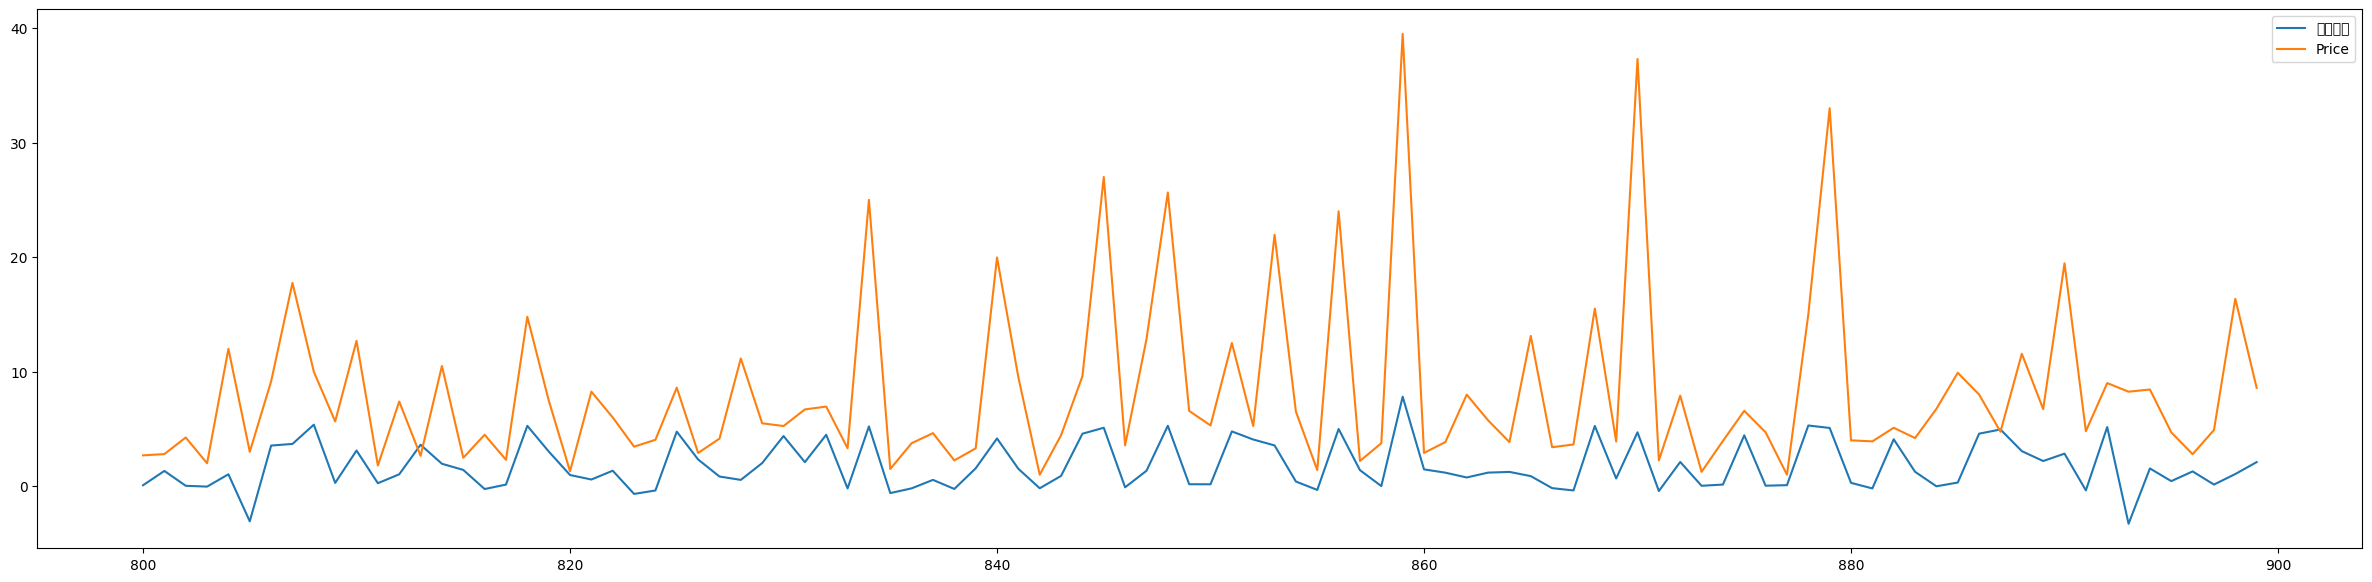

In [126]:
# 선형회귀분석 예측 정확도 시각화

plt.rc('font', family='NanumGothic')
table_li.iloc[800:900, :].plot(figsize=(30,7))